In [3]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.shell import spark
spark=SparkSession.builder.appName('kmean').getOrCreate()

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.4.1
      /_/

Using Python version 3.9.13 (main, Aug 25 2022 23:51:50)
Spark context Web UI available at http://DLL-037:4042
Spark context available as 'sc' (master = local[*], app id = local-1695711436365).
SparkSession available as 'spark'.


In [5]:
df=spark.read.csv(r"D:\21bad014_ML\Wholesale customers data.csv",header=True,inferSchema=True)
df.show()

+-------+------+-----+-----+-------+------+----------------+----------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+-----+-----+-------+------+----------------+----------+
|      2|     3|12669| 9656|   7561|   214|            2674|      1338|
|      2|     3| 7057| 9810|   9568|  1762|            3293|      1776|
|      2|     3| 6353| 8808|   7684|  2405|            3516|      7844|
|      1|     3|13265| 1196|   4221|  6404|             507|      1788|
|      2|     3|22615| 5410|   7198|  3915|            1777|      5185|
|      2|     3| 9413| 8259|   5126|   666|            1795|      1451|
|      2|     3|12126| 3199|   6975|   480|            3140|       545|
|      2|     3| 7579| 4956|   9426|  1669|            3321|      2566|
|      1|     3| 5963| 3648|   6192|   425|            1716|       750|
|      2|     3| 6006|11093|  18881|  1159|            7425|      2098|
|      2|     3| 3366| 5403|  12974|  4400|            5977|    

In [6]:
df.printSchema()

root
 |-- Channel: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- Fresh: integer (nullable = true)
 |-- Milk: integer (nullable = true)
 |-- Grocery: integer (nullable = true)
 |-- Frozen: integer (nullable = true)
 |-- Detergents_Paper: integer (nullable = true)
 |-- Delicassen: integer (nullable = true)



In [7]:
assembler=VectorAssembler(inputCols=df.columns,outputCol='features')
new_df=assembler.transform(df)
new_df.show()

+-------+------+-----+-----+-------+------+----------------+----------+--------------------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|            features|
+-------+------+-----+-----+-------+------+----------------+----------+--------------------+
|      2|     3|12669| 9656|   7561|   214|            2674|      1338|[2.0,3.0,12669.0,...|
|      2|     3| 7057| 9810|   9568|  1762|            3293|      1776|[2.0,3.0,7057.0,9...|
|      2|     3| 6353| 8808|   7684|  2405|            3516|      7844|[2.0,3.0,6353.0,8...|
|      1|     3|13265| 1196|   4221|  6404|             507|      1788|[1.0,3.0,13265.0,...|
|      2|     3|22615| 5410|   7198|  3915|            1777|      5185|[2.0,3.0,22615.0,...|
|      2|     3| 9413| 8259|   5126|   666|            1795|      1451|[2.0,3.0,9413.0,8...|
|      2|     3|12126| 3199|   6975|   480|            3140|       545|[2.0,3.0,12126.0,...|
|      2|     3| 7579| 4956|   9426|  1669|            3321|      2566

In [17]:
from pyspark.ml.evaluation import ClusteringEvaluator
lis=[]
for i in range(2,10):
    bisecting_kmeans = BisectingKMeans(featuresCol='features', k=i, minDivisibleClusterSize =1)
    model = bisecting_kmeans.fit(new_df)
    prediction=model.transform(new_df)
    evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='features',metricName='silhouette',distanceMeasure='squaredEuclidean')
    score=evaluator.evaluate(prediction)
    lis.append(score)
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.5875324233371718
Silhouette Score for k = 3 is 0.5875324233371718
Silhouette Score for k = 4 is 0.5875324233371718
Silhouette Score for k = 5 is 0.5875324233371718
Silhouette Score for k = 6 is 0.5875324233371718
Silhouette Score for k = 7 is 0.5875324233371718
Silhouette Score for k = 8 is 0.5875324233371718
Silhouette Score for k = 9 is 0.5875324233371718


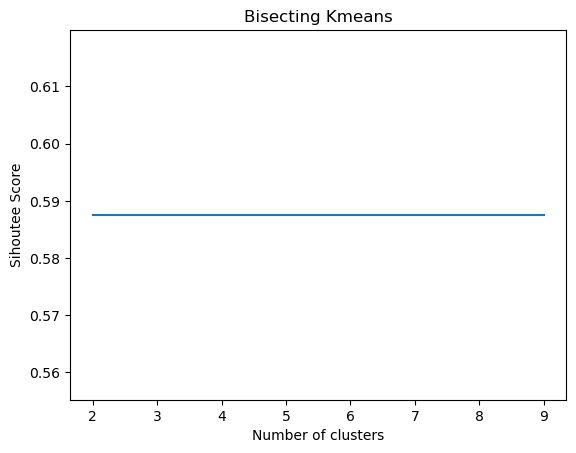

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(2, 10), lis)
plt.title('Bisecting Kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('Sihoutee Score')
plt.show()

In [16]:
print(score)


0.5875324233371718
